<a href="https://colab.research.google.com/github/viswamsarabu/UTAustin/blob/main/Personal_Loan_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**


## Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and to identify which segment of customers to target more.


## Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.


## Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

# **Data Background and Contents**

## Import libraries

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    make_scorer,
    confusion_matrix
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Overview of the dataset

In [41]:
df_main = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Loan_Modelling.csv")

In [42]:
# copying data to another variable to avoid any changes to original data
data = df_main.copy()

In [43]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


In [44]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.90000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80000,1,0,0,0,0,1,1


*   there are 5000 rows in the dataset




In [45]:
data.shape

(5000, 14)

* there are 5000 rows and 14 columns

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB



*   there are no columns with null values
*   only CCAvg is the float type, rest are all integer value type



In [47]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

*  there are no null values

In [48]:
data.duplicated().sum()

0

*  there are no duplicate values

In [49]:
data.ID.nunique()

5000

*  The ID column contains only unique values, so we can drop it

In [50]:
data = data.drop(["ID"], axis=1)

In [51]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


In [52]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.00000,45.33840,11.46317,23.00000,35.00000,45.00000,55.00000,67.00000
Experience,5000.00000,20.10460,11.46795,-3.00000,10.00000,20.00000,30.00000,43.00000
Income,5000.00000,73.77420,46.03373,8.00000,39.00000,64.00000,98.00000,224.00000
ZIPCode,5000.00000,93169.25700,1759.45509,90005.00000,91911.00000,93437.00000,94608.00000,96651.00000
Family,5000.00000,2.39640,1.14766,1.00000,1.00000,2.00000,3.00000,4.00000
CCAvg,5000.00000,1.93794,1.74766,0.00000,0.70000,1.50000,2.50000,10.00000
Education,5000.00000,1.88100,0.83987,1.00000,1.00000,2.00000,3.00000,3.00000
Mortgage,5000.00000,56.49880,101.71380,0.00000,0.00000,0.00000,101.00000,635.00000
Personal_Loan,5000.00000,0.09600,0.29462,0.00000,0.00000,0.00000,0.00000,1.00000
Securities_Account,5000.00000,0.10440,0.30581,0.00000,0.00000,0.00000,0.00000,1.00000


*  Average age of the customers is around 45 years
*  Average annual income is around 73,000 dollars
*  Average spending on Credit cards per month is $2000
*  Around 1/3rd of customers use the credit card issued by other banks

# **Exploratory Data Analysis (EDA)**

## Define custom Plots

In [53]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [54]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [55]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [56]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [57]:
## Function to plot stacked bar chart
def stacked_plot(x, y):
    """
    Shows stacked plot from x and y pandas data series
    x: pandas data series
    y: pandas data series
    """
    info = pd.crosstab(x, y, margins=True)
    info['% - 0'] = round(info[0]/info['All']*100, 2)
    info['% - 1'] = round(info[1]/info['All']*100, 2)
    print(info)
    print('='*80)
    visual = pd.crosstab(x, y, normalize='index')
    visual.plot(kind='bar', stacked=True, figsize=(10,5));

## Univariate Analysis

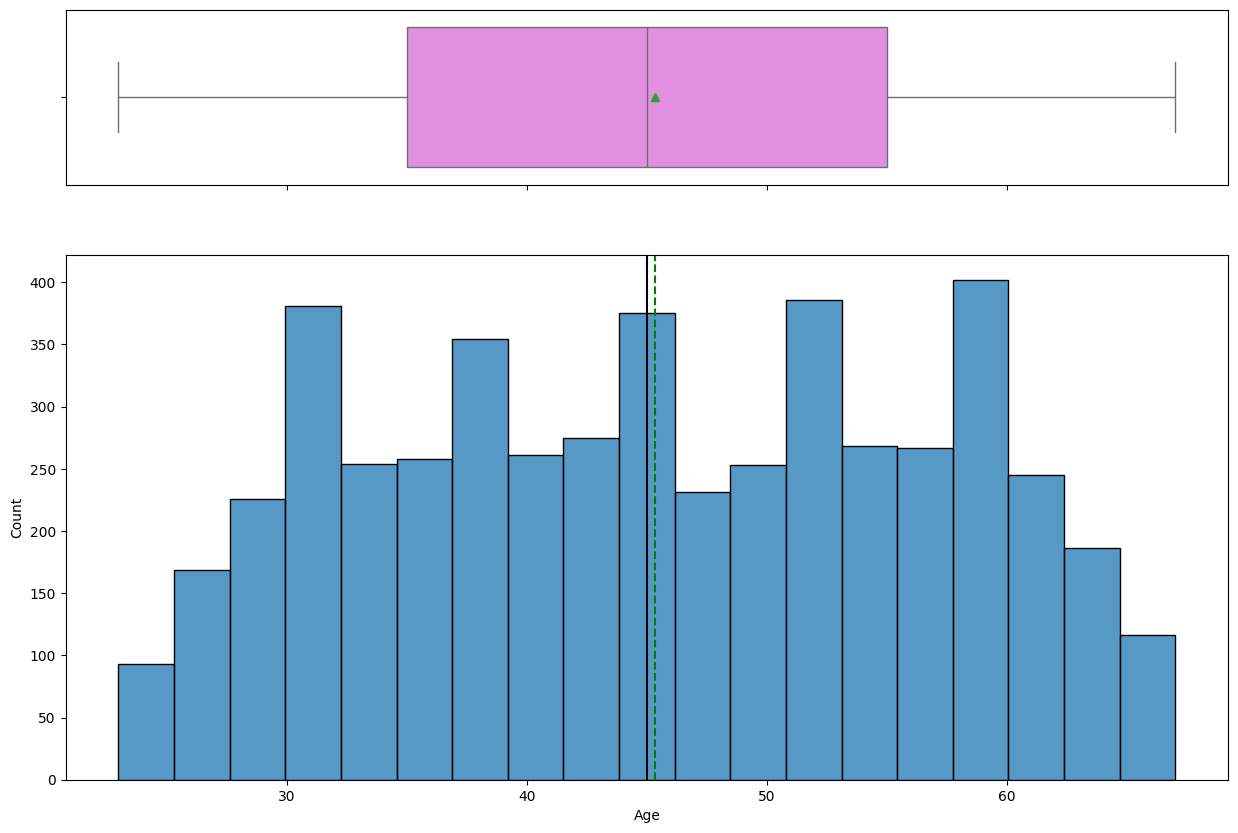

In [58]:
histogram_boxplot(data, "Age")

* Customer Age distribution looks even, with average age around 45 and no outliers

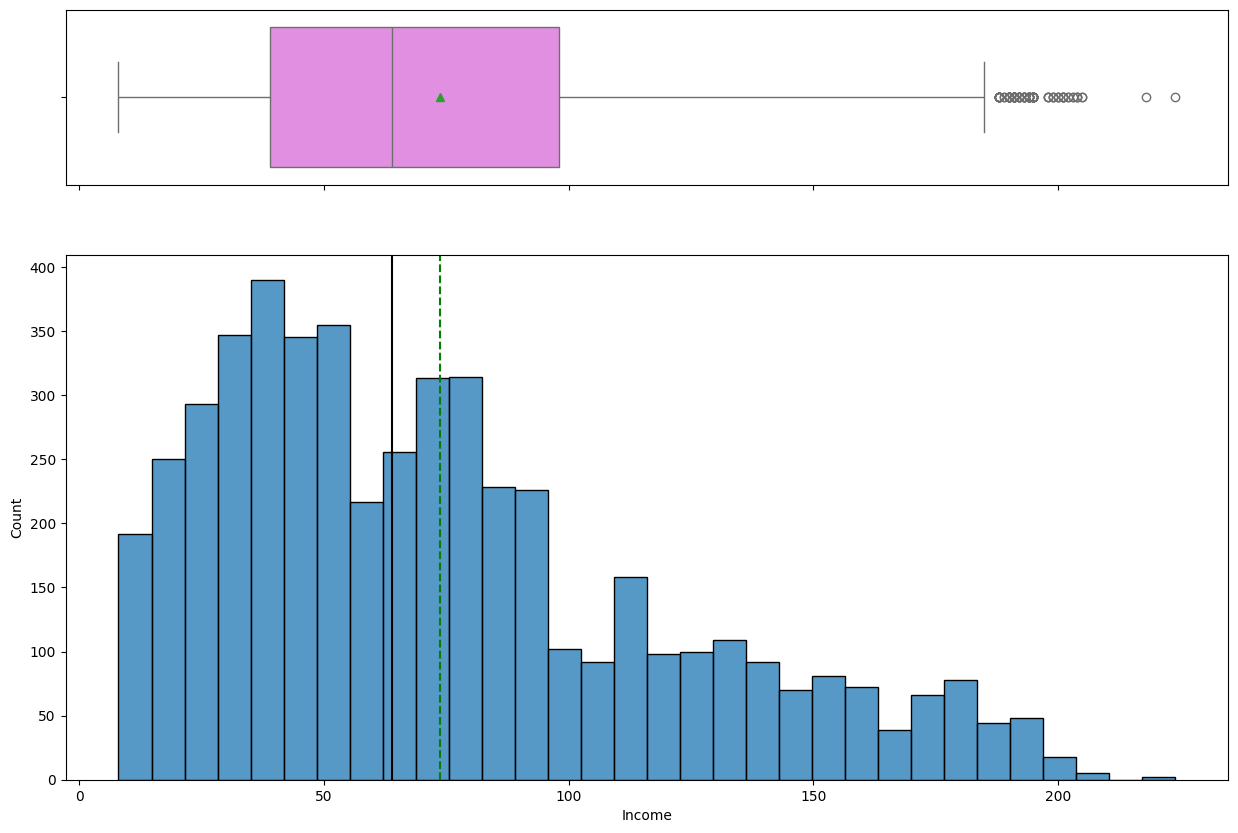

In [59]:
histogram_boxplot(data, "Income")

*  Income distribution looks right skewed with mean income around 73,000 dollars
*  There are many outliers on the upper quartile

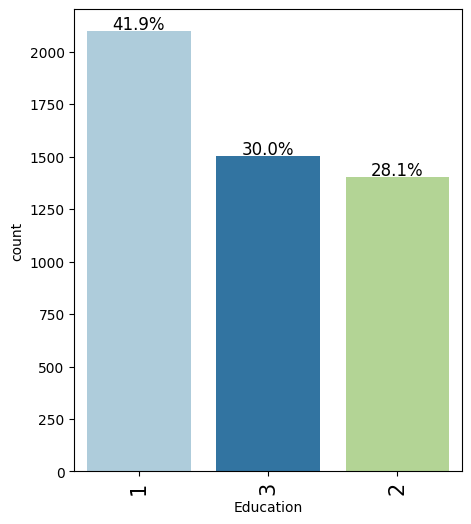

In [60]:
labeled_barplot(data, "Education", perc=True)

42% of the customers are under-graduates

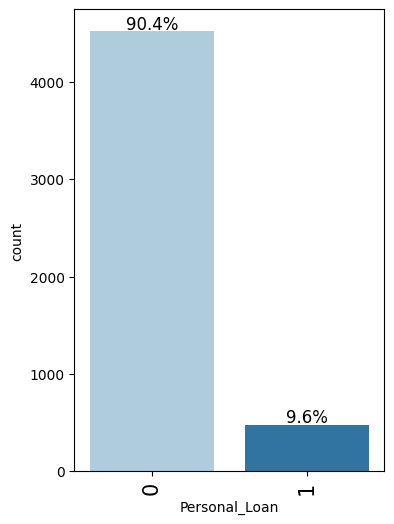

In [61]:
labeled_barplot(data, "Personal_Loan", perc=True)

*  9.6% of the customers have purchased the Personal Loan

## BiVariate Analysis

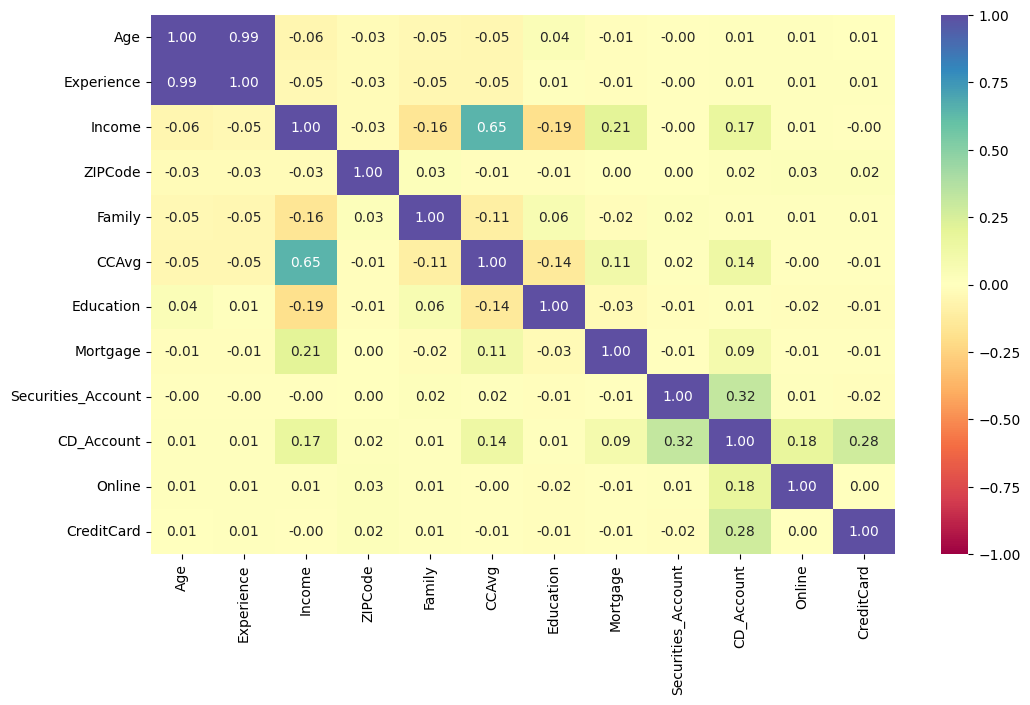

In [62]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
cols_list.remove('Personal_Loan')

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

*  Only CCAvg and Income have strong positive correlation, nothing much else
*  Of course, Age and Experience have strong positive correlation as well, understandbly 😆

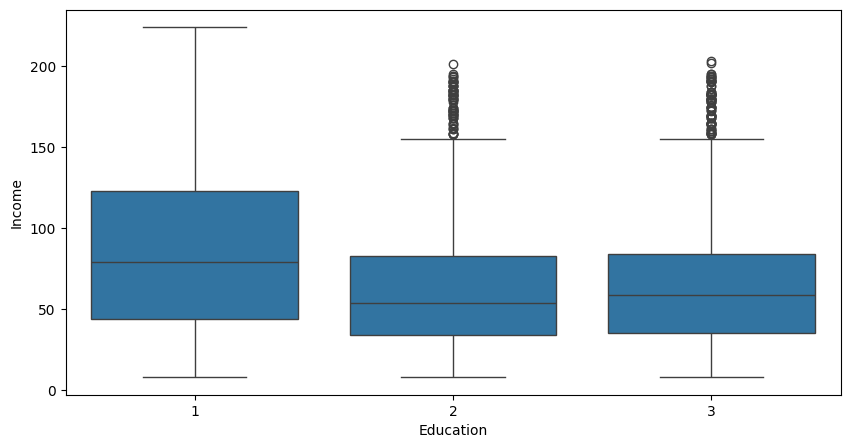

In [63]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Education", y="Income")
plt.show()

* Lot of outliers for people with Grad and Post-Grad

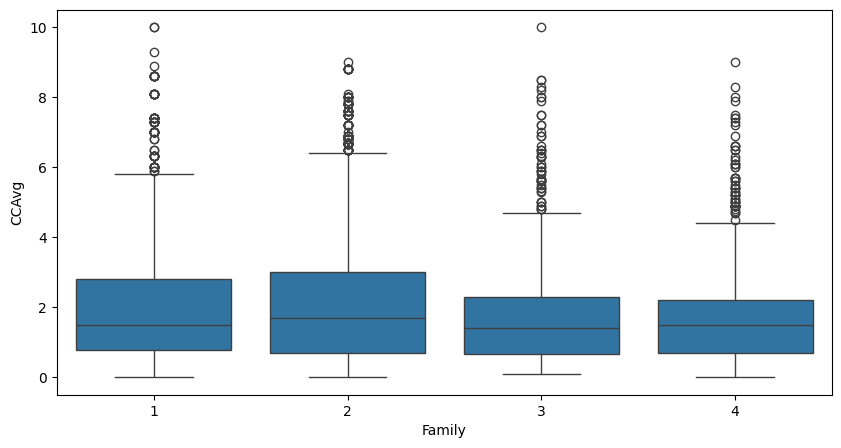

In [64]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Family", y="CCAvg")
plt.show()

In [65]:
print(f'There are {data[data.Mortgage==0].shape[0]} rows where mortgage equals to ZERO!')

There are 3462 rows where mortgage equals to ZERO!


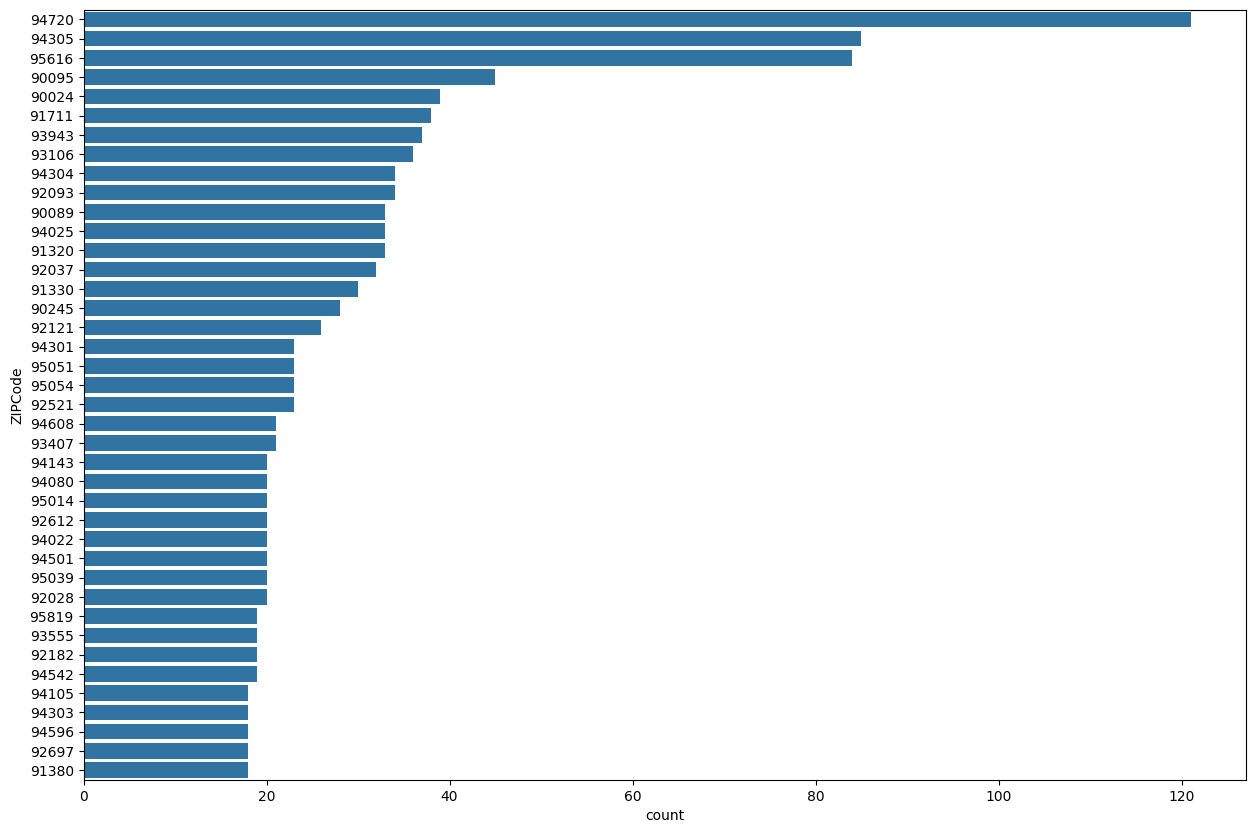

In [66]:
plt.figure(figsize=(15, 10))
sns.countplot(y=data[data.Mortgage==0]['ZIPCode'],
              data=data,
              order=data[data.Mortgage==0]['ZIPCode'].value_counts().index[:40]);

* Observations:
* The zipcode 94720 has the most number of mortgages of Zero value (120 values)
* The second highest number of zero values is 94305, and the third highest is 95616.

Personal_Loan     0    1   All    % - 0    % - 1
Family                                          
1              1365  107  1472 92.73000  7.27000
2              1190  106  1296 91.82000  8.18000
3               877  133  1010 86.83000 13.17000
4              1088  134  1222 89.03000 10.97000
All            4520  480  5000 90.40000  9.60000


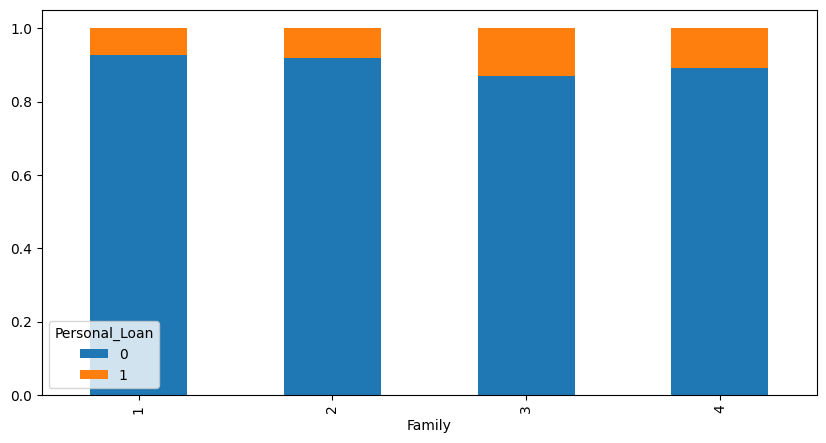

In [67]:
stacked_plot(data.Family, data.Personal_Loan)

* Customers with Family of 4 have more Personal Loans, followed by Family of 3.

Personal_Loan     0    1   All    % - 0    % - 1
CD_Account                                      
0              4358  340  4698 92.76000  7.24000
1               162  140   302 53.64000 46.36000
All            4520  480  5000 90.40000  9.60000


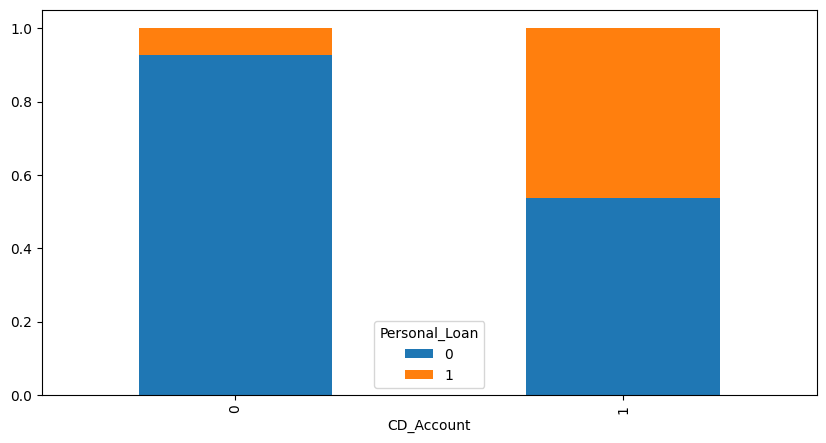

In [68]:
stacked_plot(data.CD_Account, data.Personal_Loan)

* Those customers with cd accounts. have a greater percentage of personal loans than those customer without a cd account.


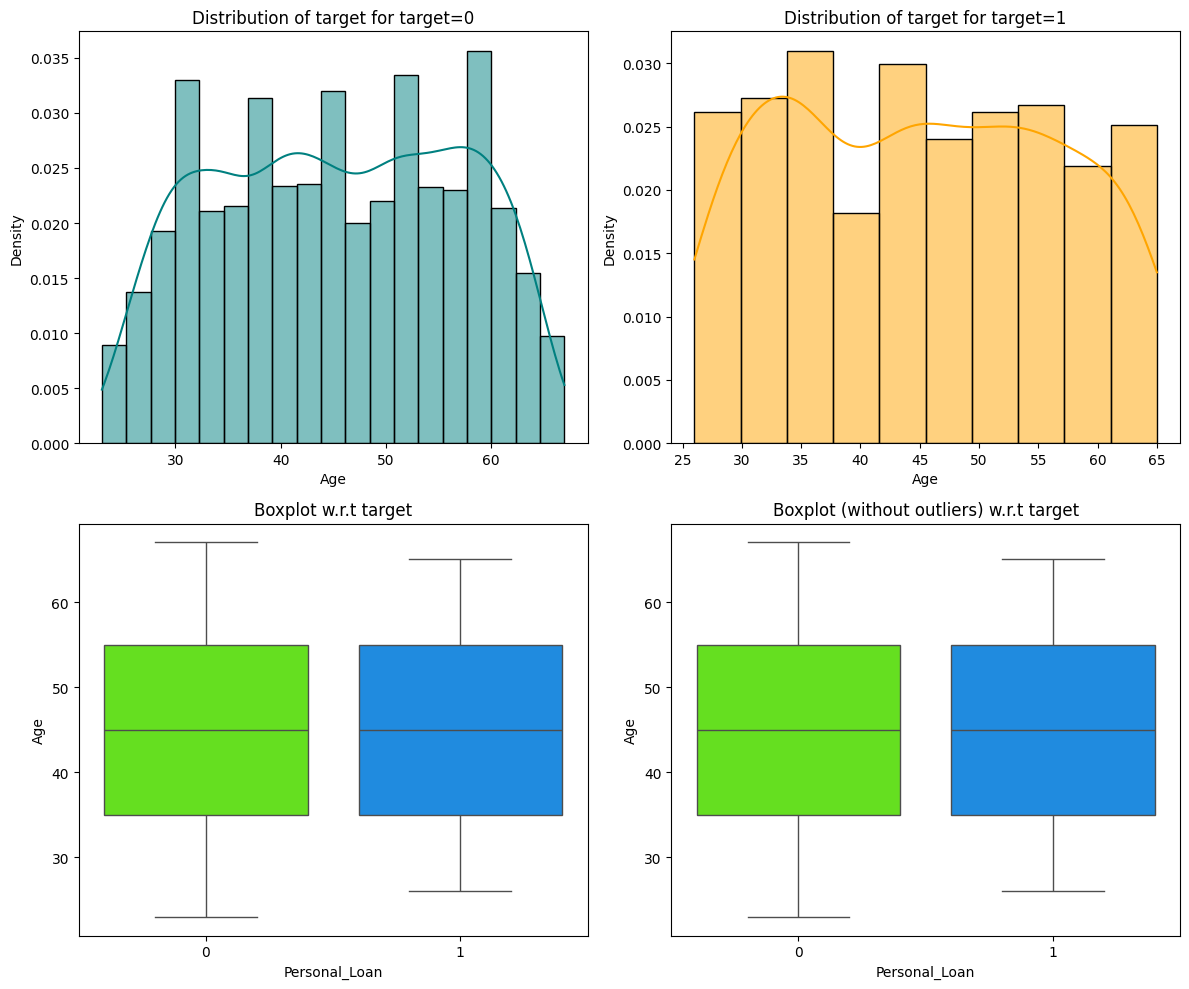

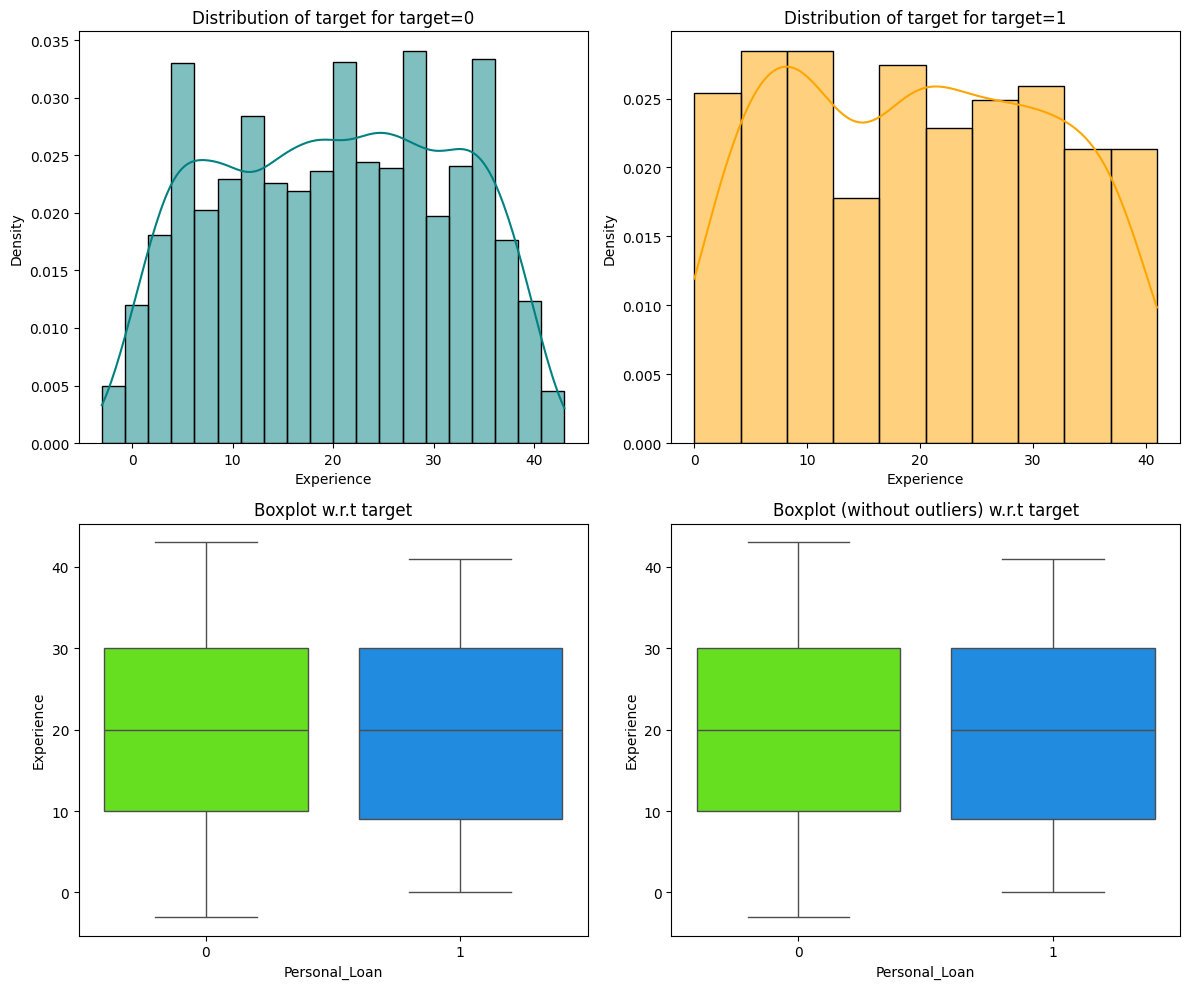

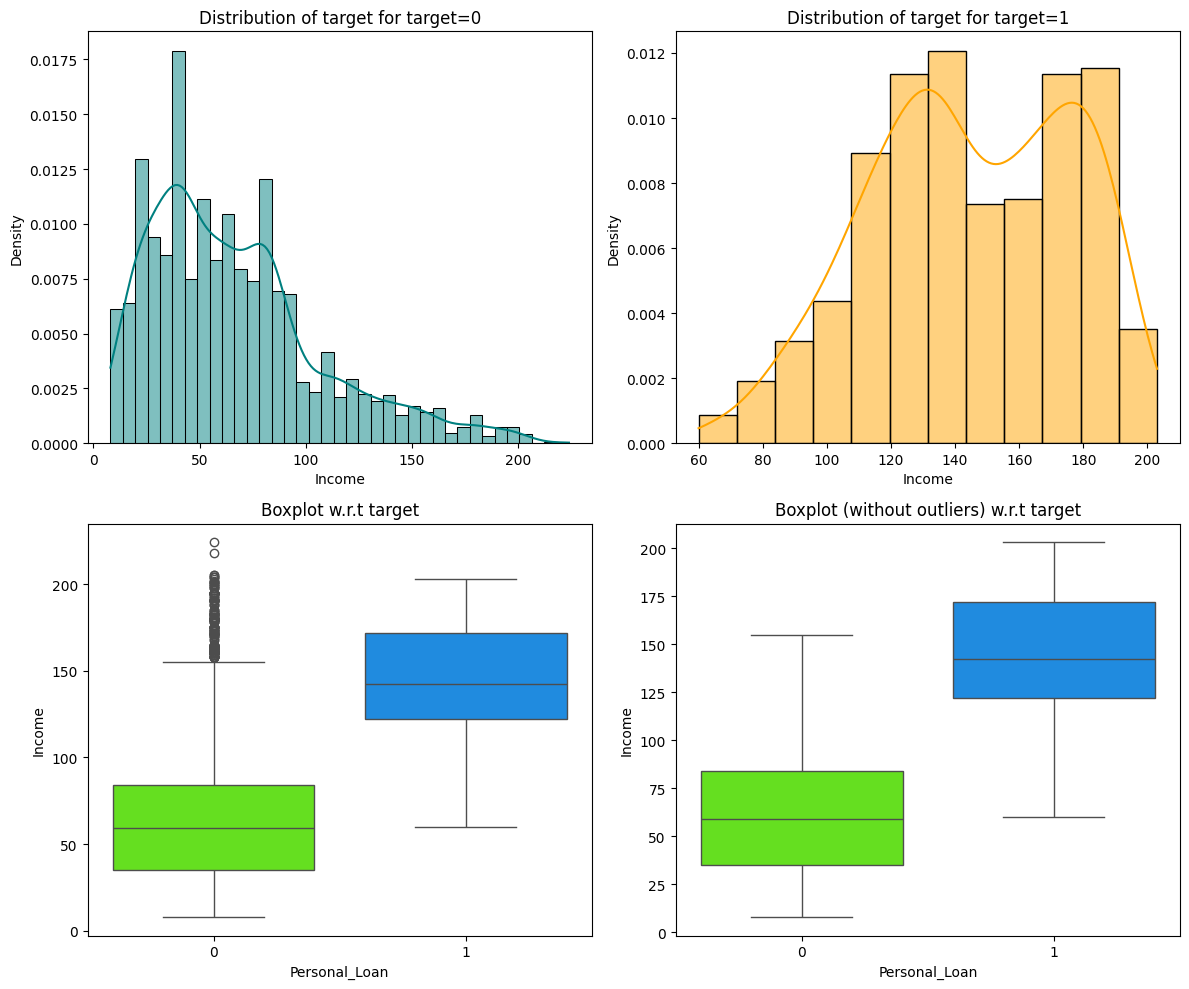

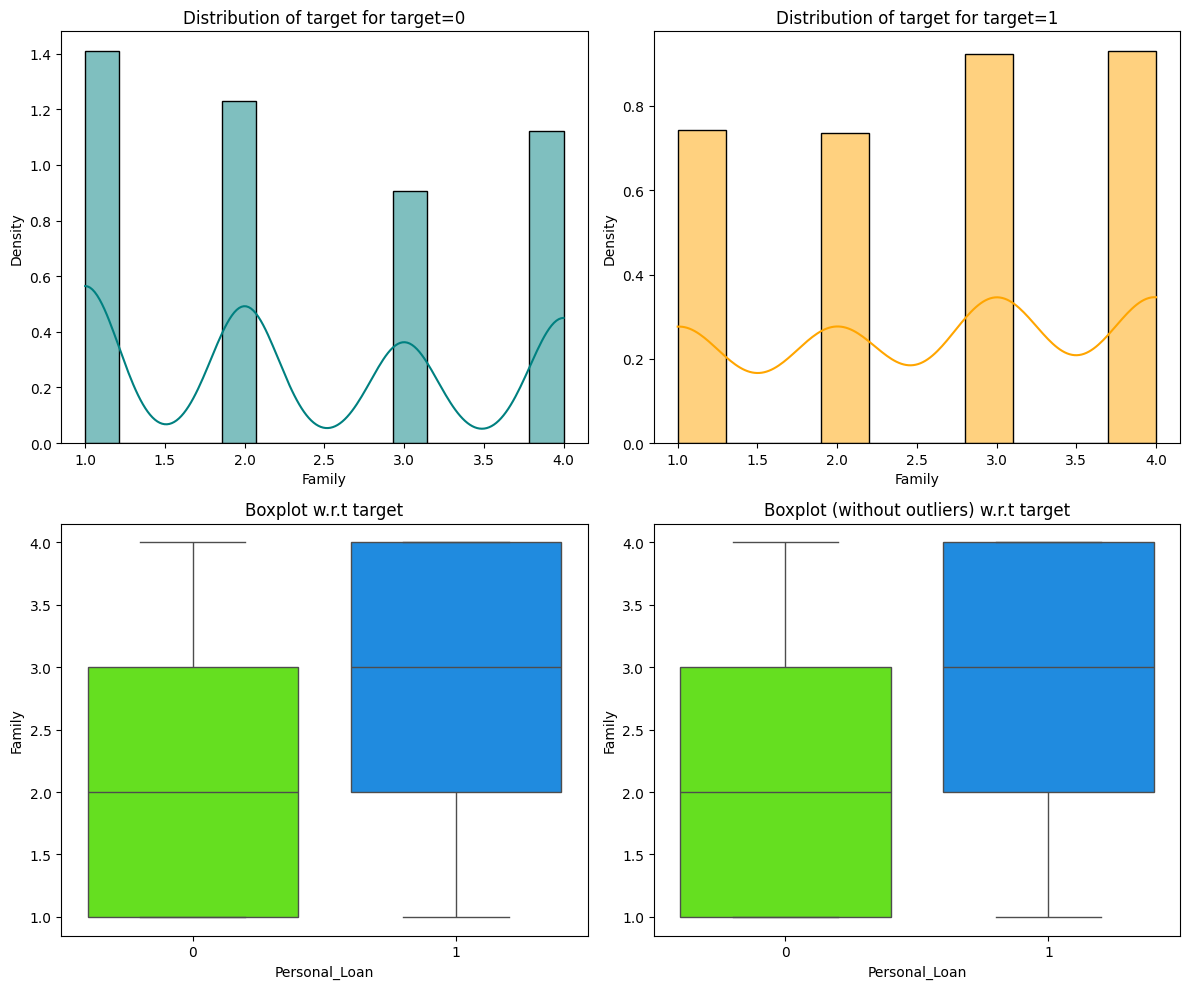

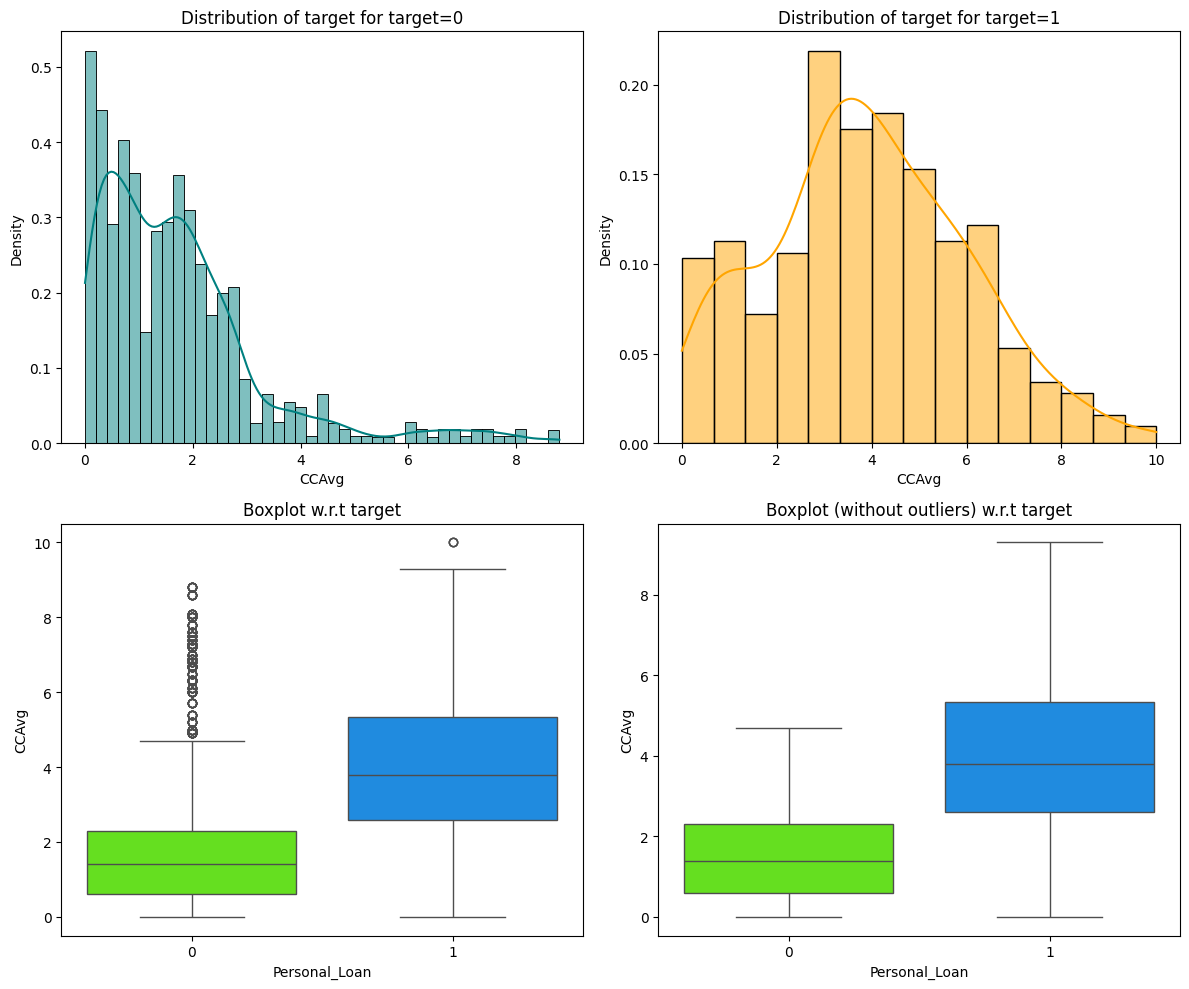

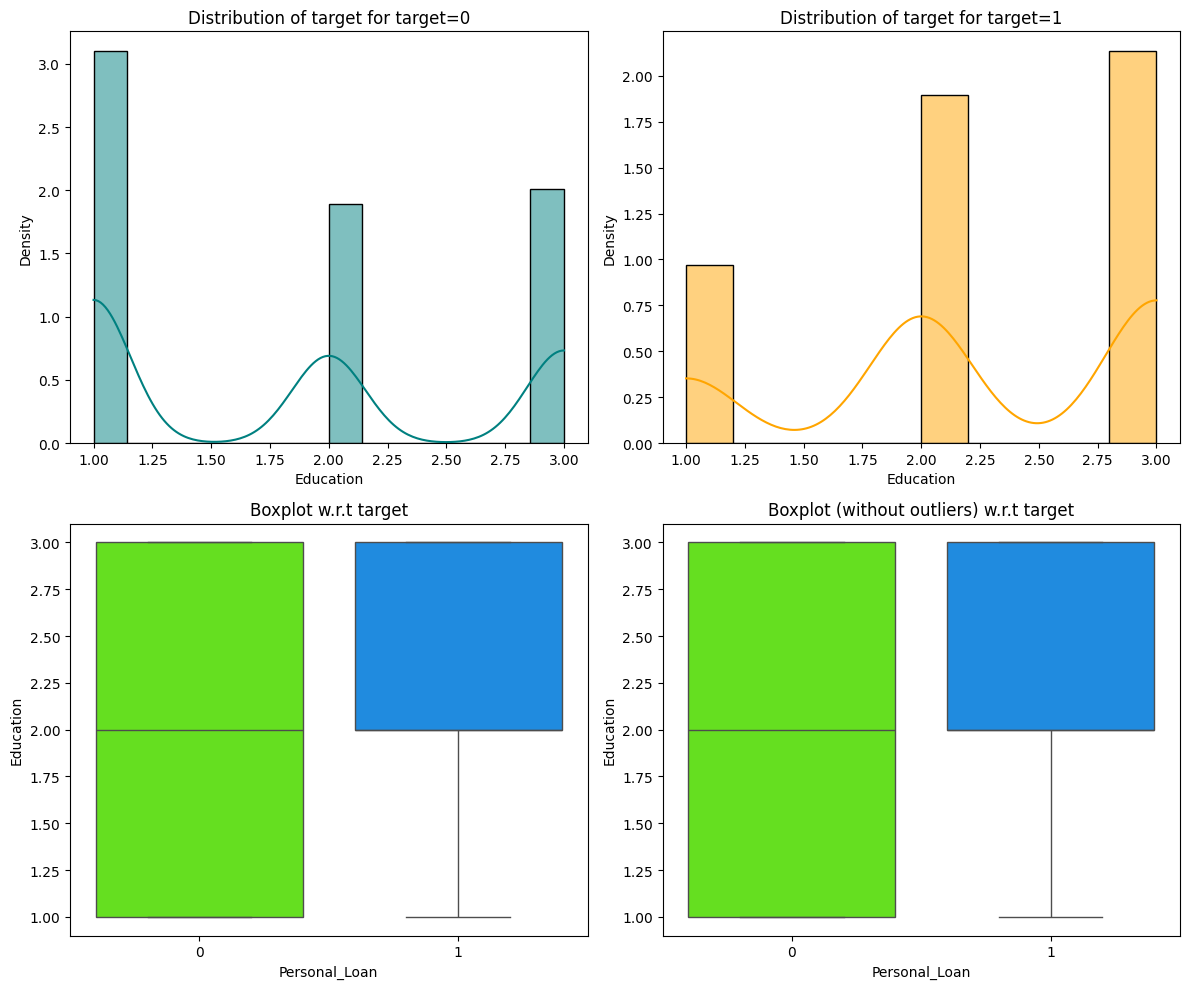

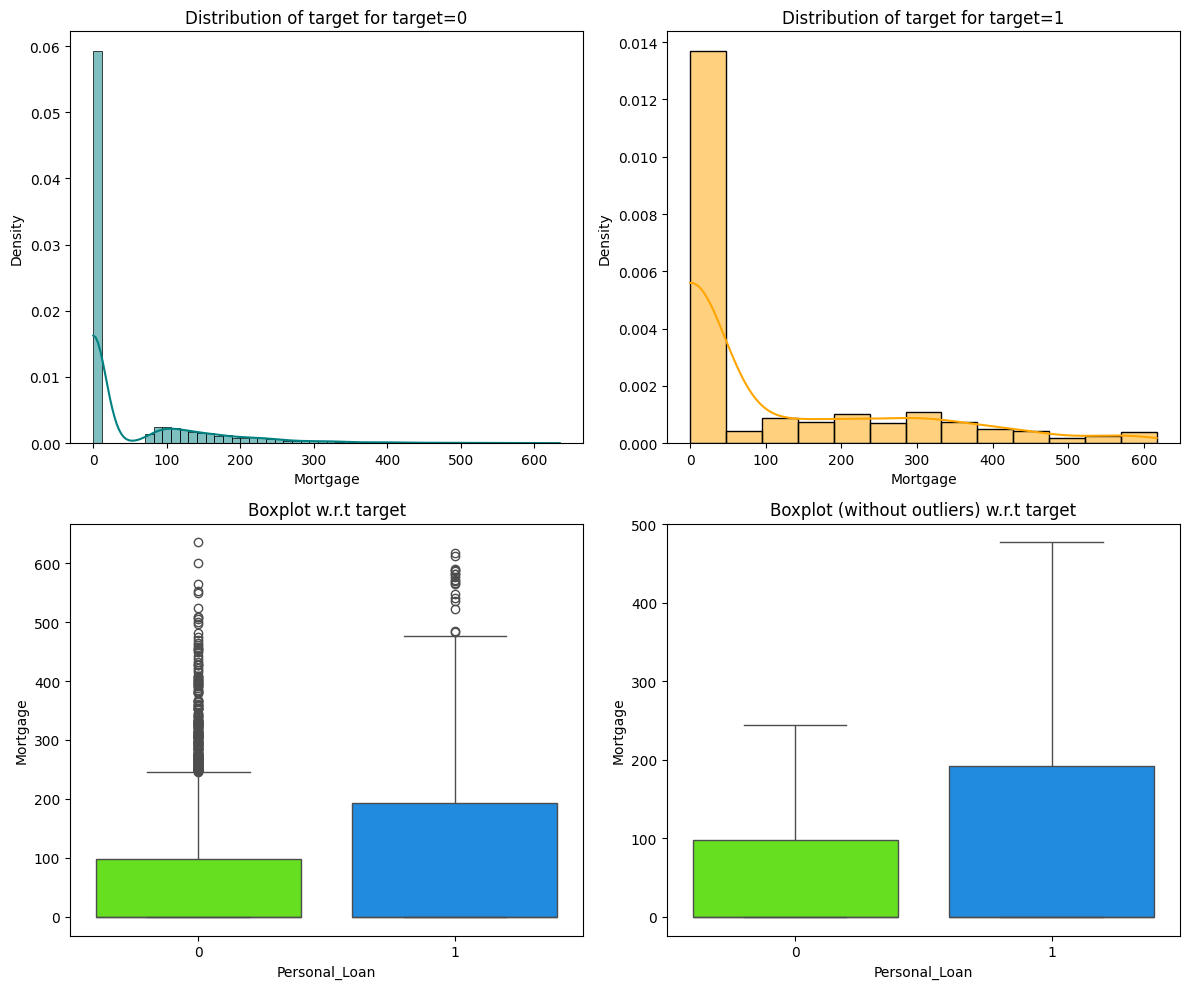

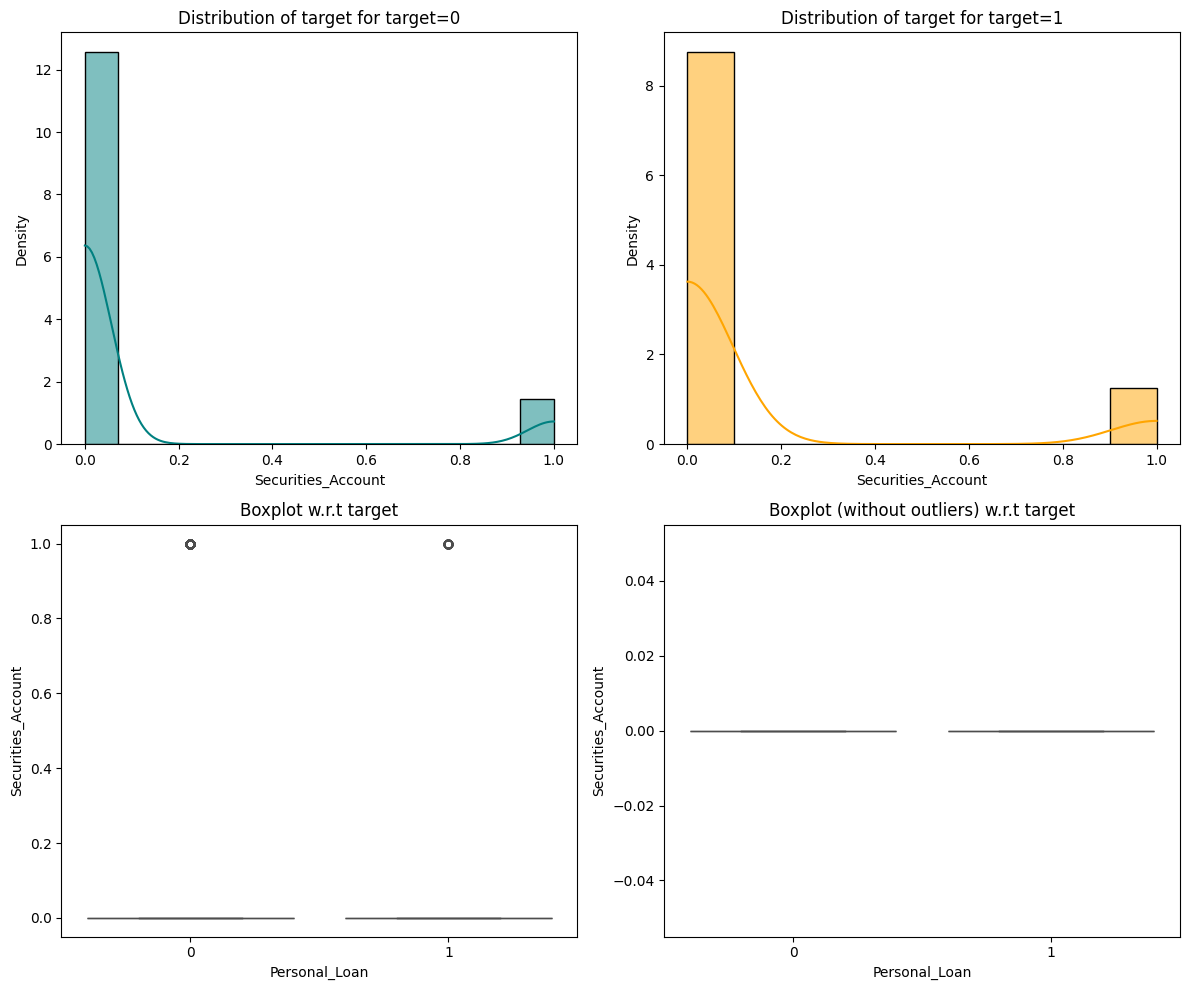

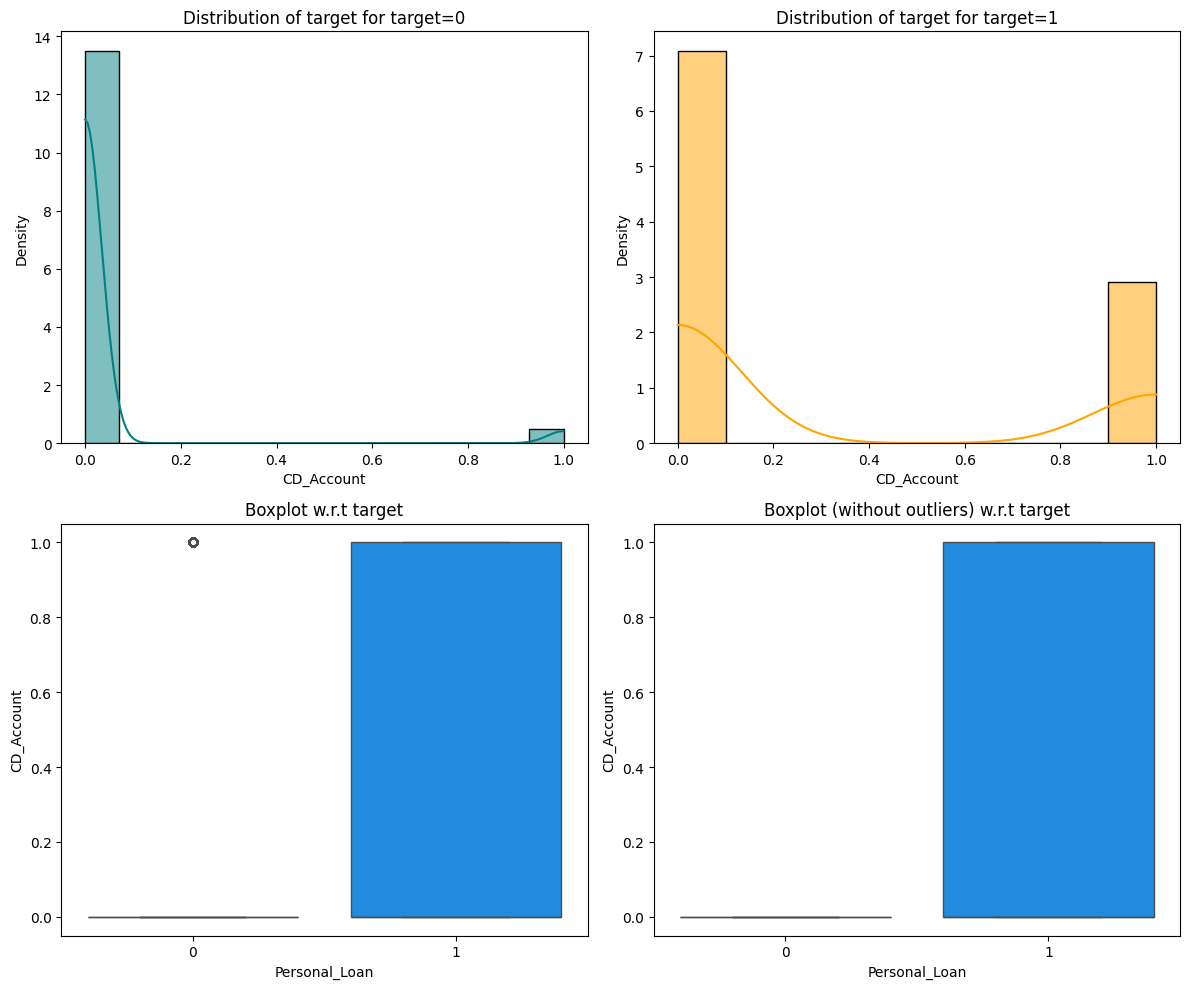

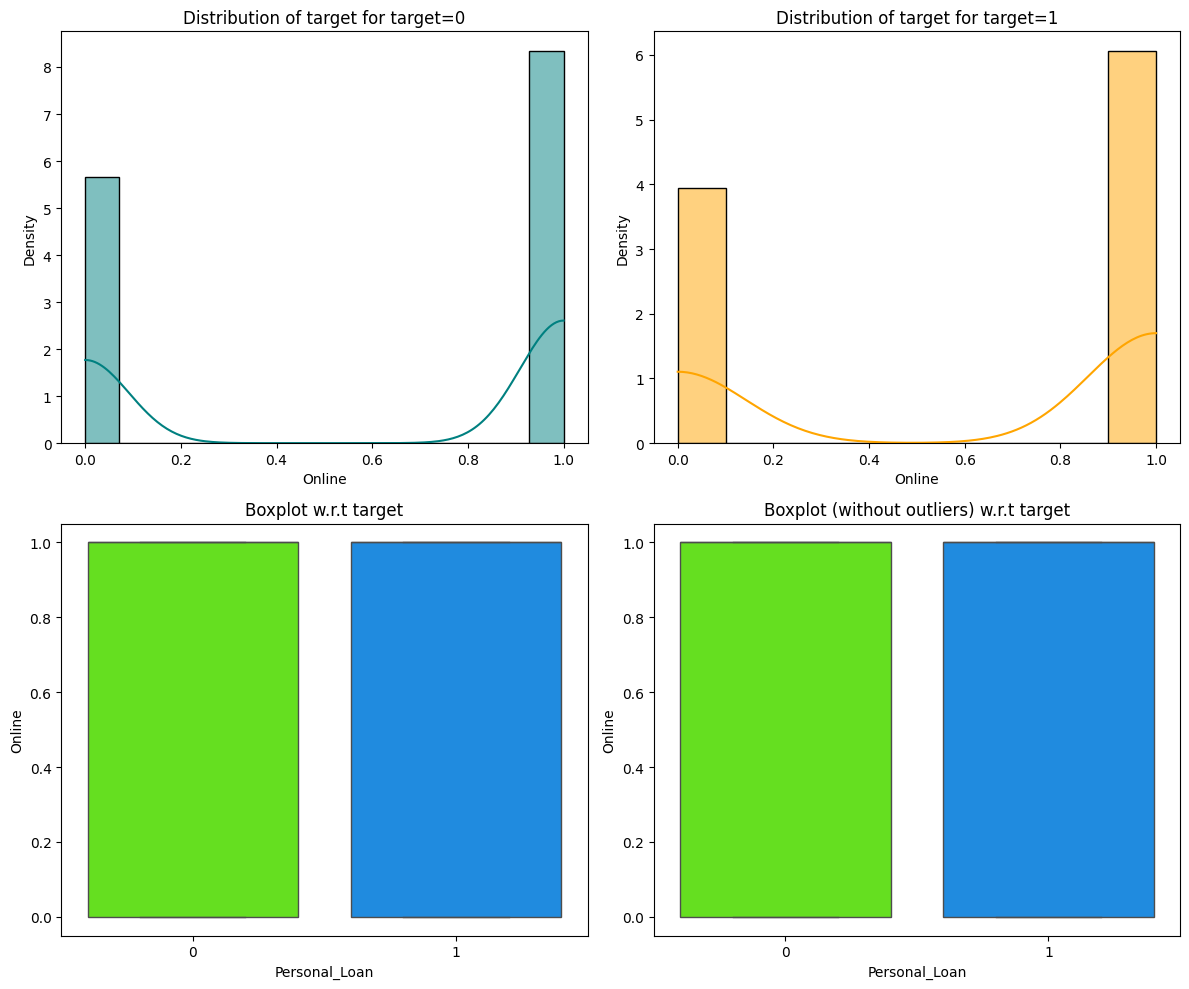

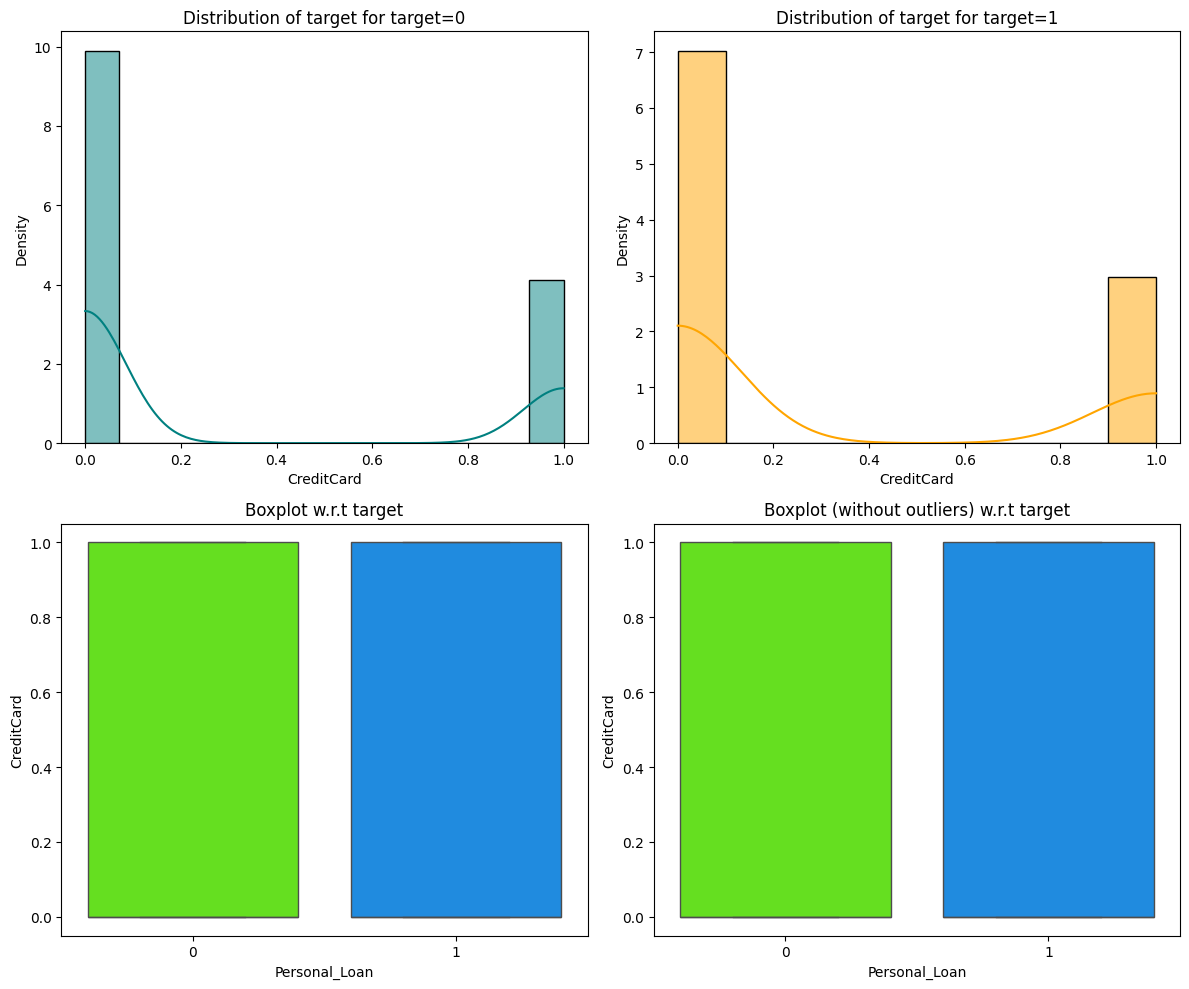

In [214]:
valid_options = ["ZIPCode", "Personal_Loan"] ## Removing Zip code & target from loop
for column in data.columns:
    if column not in valid_options:
        distribution_plot_wrt_target(data,column, "Personal_Loan")

# **Data Pre-Processing**

In [69]:
try:
    data.drop(['experience'], axis=1, inplace=True)
except KeyError:
    print(f"Column experience must already be dropped.")
data.head()

Column experience must already be dropped.


,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


In [70]:
data_dummies = pd.get_dummies(data, columns=['Education', 'Family'], drop_first=True)
data_dummies.head()

,Age,Experience,Income,ZIPCode,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_2,Education_3,Family_2,Family_3,Family_4
0,25,1,49,91107,1.60000,0,0,1,0,0,0,False,False,False,False,True
1,45,19,34,90089,1.50000,0,0,1,0,0,0,False,False,False,True,False
2,39,15,11,94720,1.00000,0,0,0,0,0,0,False,False,False,False,False
3,35,9,100,94112,2.70000,0,0,0,0,0,0,True,False,False,False,False
4,35,8,45,91330,1.00000,0,0,0,0,0,1,True,False,False,False,True


In [71]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Mortgage            5000 non-null   int64  
 6   Personal_Loan       5000 non-null   int64  
 7   Securities_Account  5000 non-null   int64  
 8   CD_Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
 11  Education_2         5000 non-null   bool   
 12  Education_3         5000 non-null   bool   
 13  Family_2            5000 non-null   bool   
 14  Family_3            5000 non-null   bool   
 15  Family_4            5000 non-null   bool   
dtypes: boo

### Partition Data

In [72]:
X = data_dummies.drop(['Personal_Loan'], axis=1)
X.head(10)

,Age,Experience,Income,ZIPCode,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_2,Education_3,Family_2,Family_3,Family_4
0,25,1,49,91107,1.60000,0,1,0,0,0,False,False,False,False,True
1,45,19,34,90089,1.50000,0,1,0,0,0,False,False,False,True,False
2,39,15,11,94720,1.00000,0,0,0,0,0,False,False,False,False,False
3,35,9,100,94112,2.70000,0,0,0,0,0,True,False,False,False,False
4,35,8,45,91330,1.00000,0,0,0,0,1,True,False,False,False,True
5,37,13,29,92121,0.40000,155,0,0,1,0,True,False,False,False,True
6,53,27,72,91711,1.50000,0,0,0,1,0,True,False,True,False,False
7,50,24,22,93943,0.30000,0,0,0,0,1,False,True,False,False,False
8,35,10,81,90089,0.60000,104,0,0,1,0,True,False,False,True,False
9,34,9,180,93023,8.90000,0,0,0,0,0,False,True,False,False,False


In [73]:
y = data_dummies['Personal_Loan']
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: Personal_Loan, dtype: int64

In [74]:
# Splitting data into training and test set (70% Training & 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)

print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 15)
Shape of test set :  (1500, 15)
Percentage of classes in training set:
Personal_Loan
0   0.90543
1   0.09457
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0   0.90067
1   0.09933
Name: proportion, dtype: float64


# **Build and Evaluate Model**

### Decision Tree (default)

In [117]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model Evaluation

In [118]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [119]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

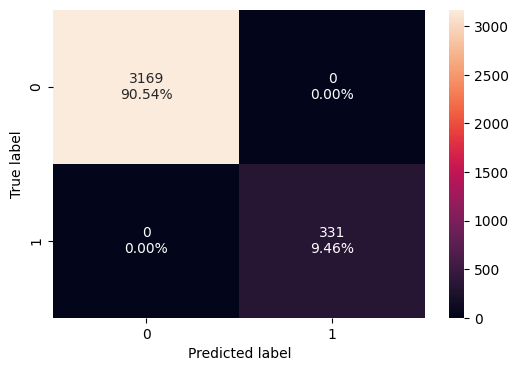

In [120]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [121]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


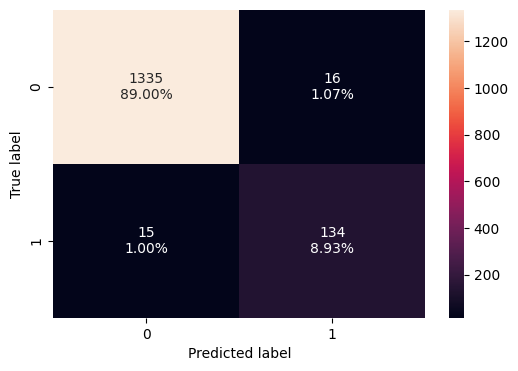

In [122]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [123]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.97933,0.89933,0.89333,0.89632


### Decision Tree (with class weights)

In [124]:
#model = DecisionTreeClassifier(criterion='gini',
#                               class_weight={0:0.15, 1:0.85},
#                               random_state=1)
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

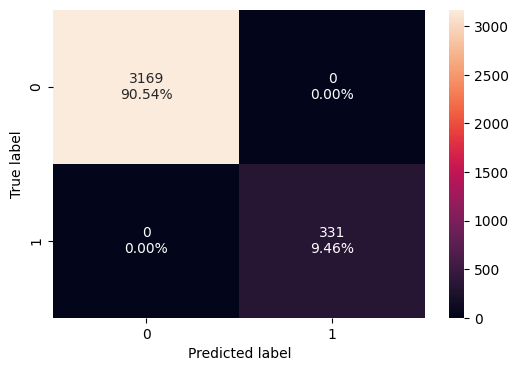

In [125]:
confusion_matrix_sklearn(model, X_train, y_train)

In [126]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

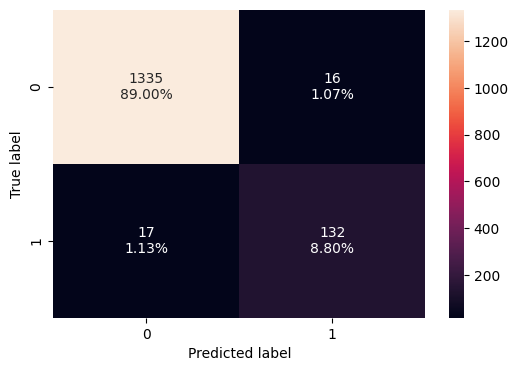

In [127]:
confusion_matrix_sklearn(model, X_test, y_test)

In [128]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.97800,0.88591,0.89189,0.88889


* There is a decent amount of disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

**Let's use pruning techniques to try and reduce overfitting.**

# **Model Performance Evaluation and Improvement**

### Decision Tree (Pre-pruning)

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [159]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2), # [2, 4, 6]
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

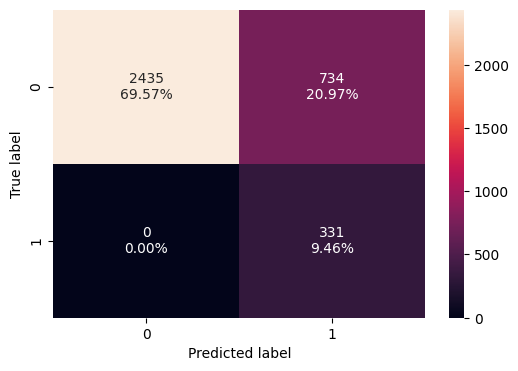

In [160]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [161]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.79029,1.00000,0.31080,0.47421


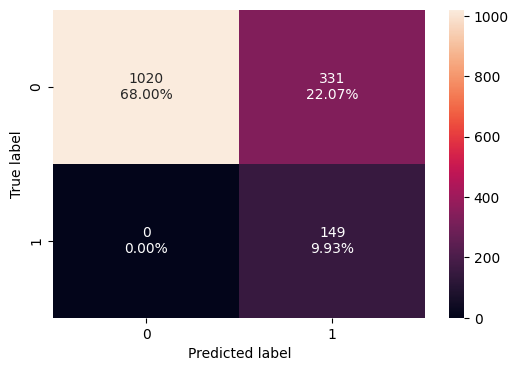

In [162]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [163]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.77933,1.00000,0.31042,0.47377


* The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 0.96 which shows that the model is able to generalize well on unseen data.

#### Features Analysis

In [189]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

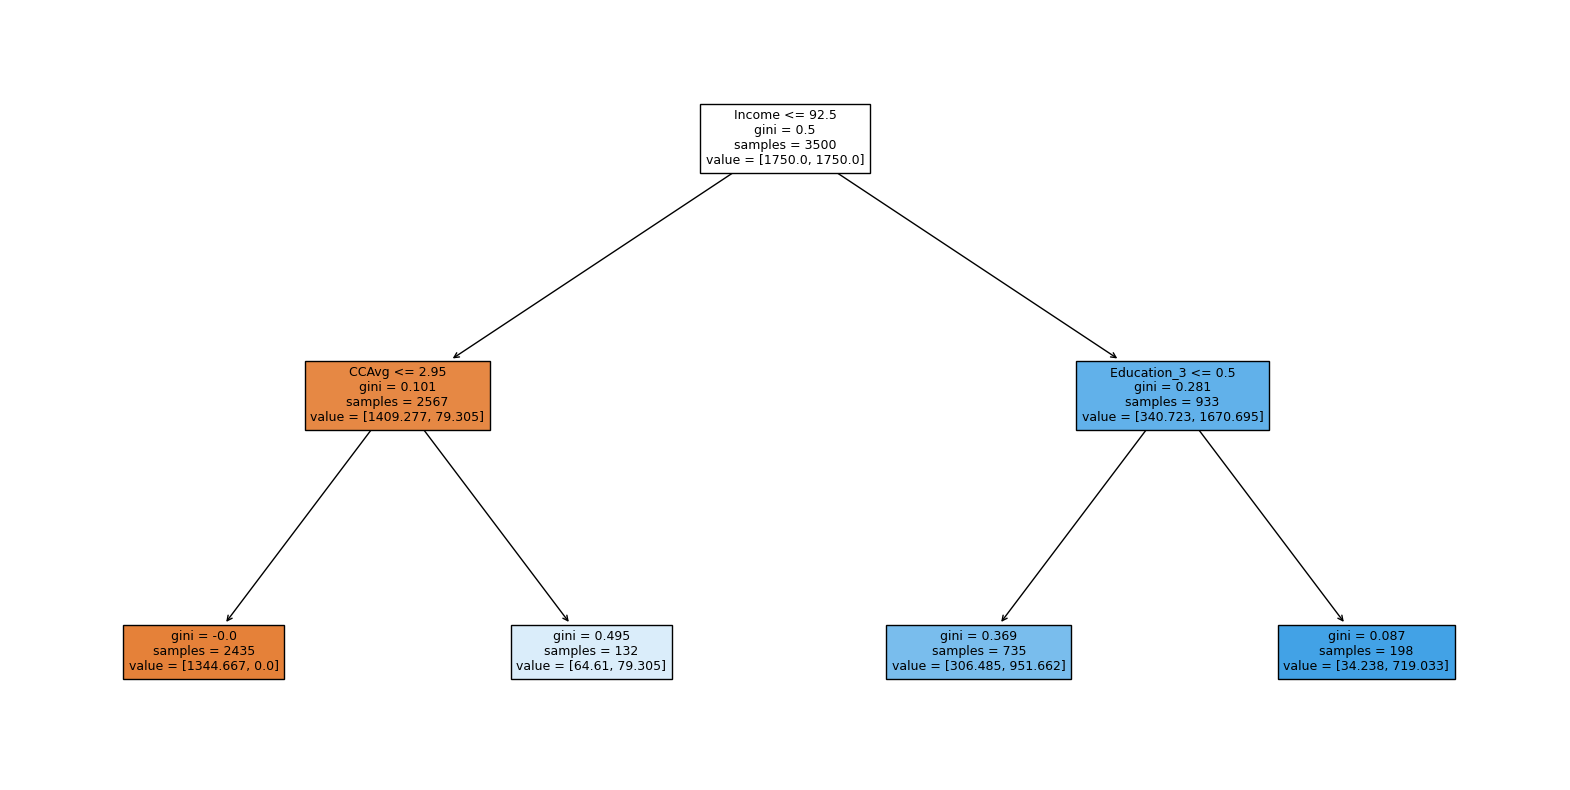

In [190]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [191]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Education_3 <= 0.50
|   |   |--- weights: [306.48, 951.66] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [34.24, 719.03] class: 1



**Observations from the pre-pruned tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

If the customer Income is less than or equal to 92,500 & Credit Card Spending Average (CCAvg) is less than 2950, then the customer is most likely to reject the Personal Loan Offer.

If the customer Income is less than or equal to 92,500 & Credit Card Spending Average (CCAvg) is more than 2950, then the customer is most likely to accept the Personal Loan Offer.

If the customer Income is less than or equal to 92,500 & with Education level is equal or more than to 3 (advanced), then the customer is most likely to accept the Personal Loan Offer.



* Importances Plot

In [192]:
importances = estimator.feature_importances_
importances

array([0.        , 0.        , 0.89915311, 0.        , 0.06866774,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03217916, 0.        , 0.        , 0.        ])

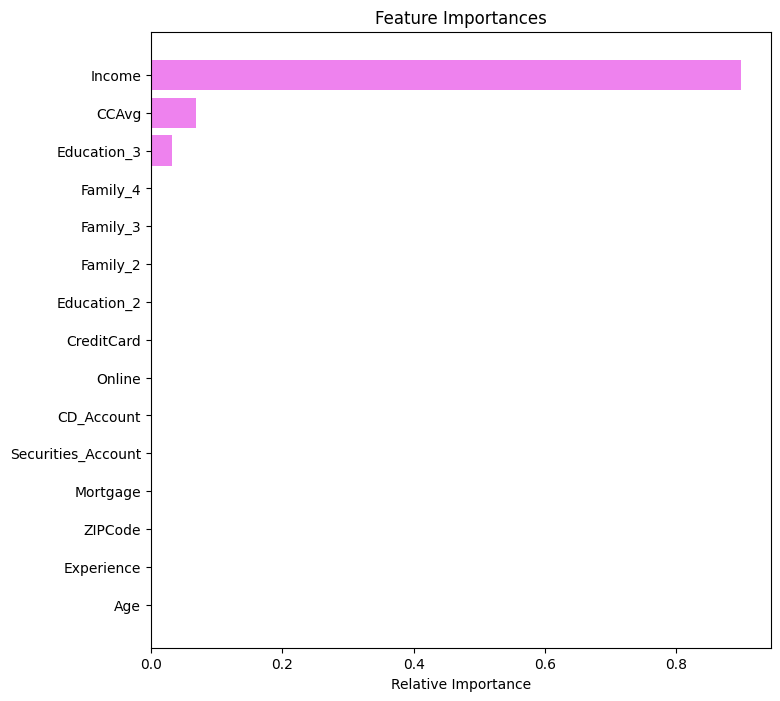

In [193]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the pre tuned decision tree, Income, CCAvg & Education (with advanced degree) are the most important features.


### Decision Tree (Post pruning)

In [194]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced") # {0: 0.15, 1: 0.85}
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [195]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,-0.00000
1,0.00000,-0.00000
2,0.00000,-0.00000
3,0.00000,-0.00000
4,0.00000,-0.00000
5,0.00000,-0.00000
6,0.00000,-0.00000
7,0.00000,-0.00000
8,0.00000,-0.00000
9,0.00000,-0.00000


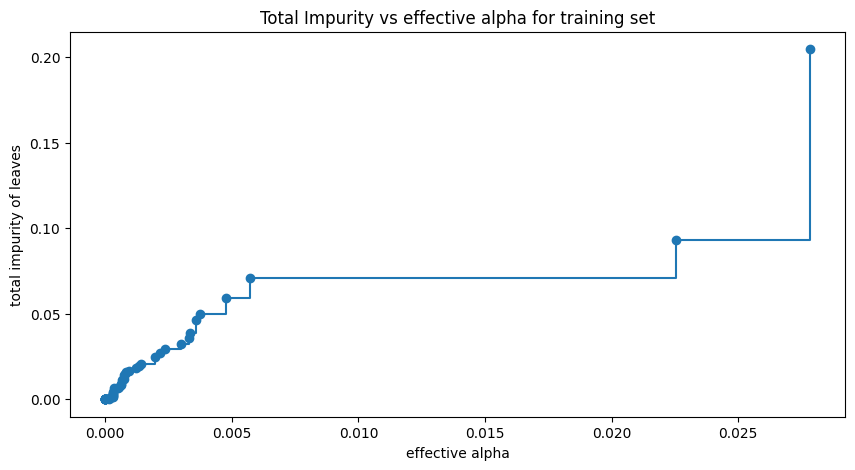

In [196]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

*  Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [197]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29537927599923136


* For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

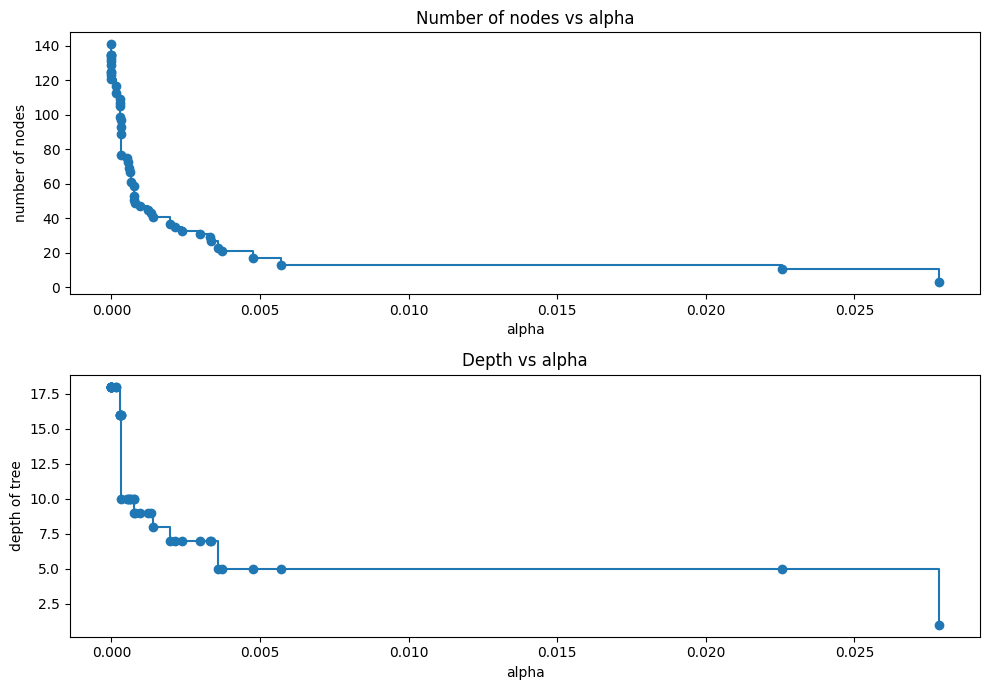

In [198]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [199]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [200]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [201]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

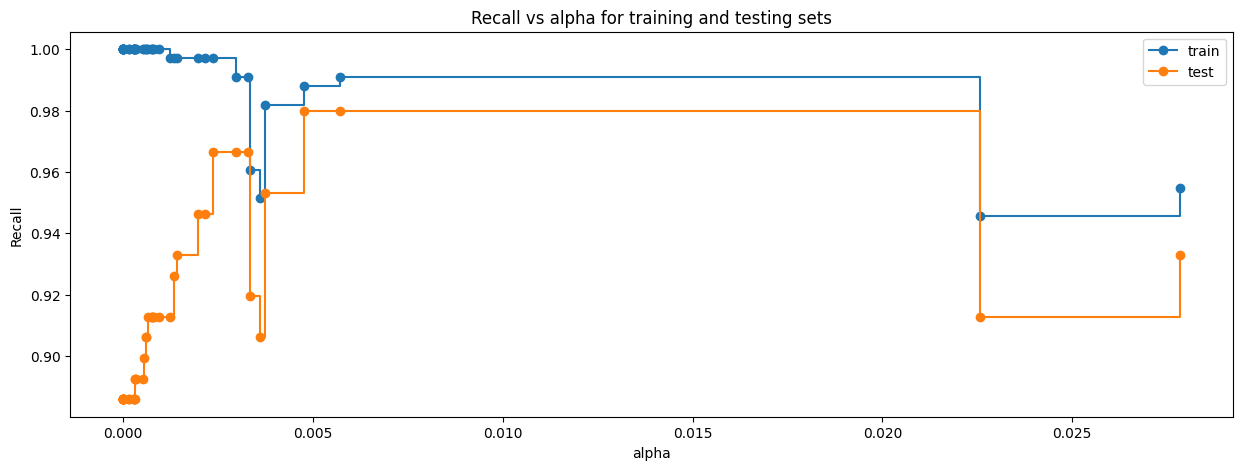

In [202]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [203]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.004754778197299197, class_weight='balanced',
                       random_state=1)


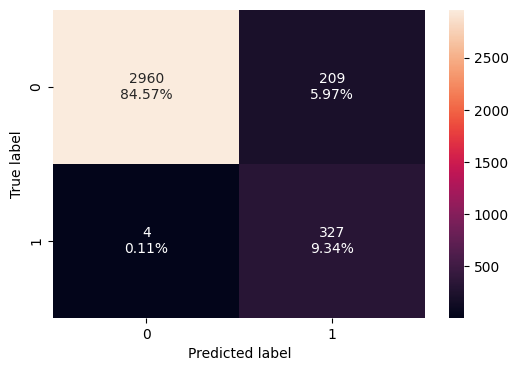

In [204]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [205]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.93914,0.98792,0.61007,0.75433


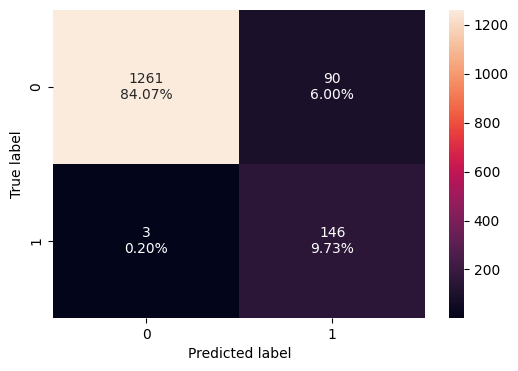

In [206]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [207]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.93800,0.97987,0.61864,0.75844


* In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are coming to be around 0.98 which shows that the model is able to generalize well on unseen data.

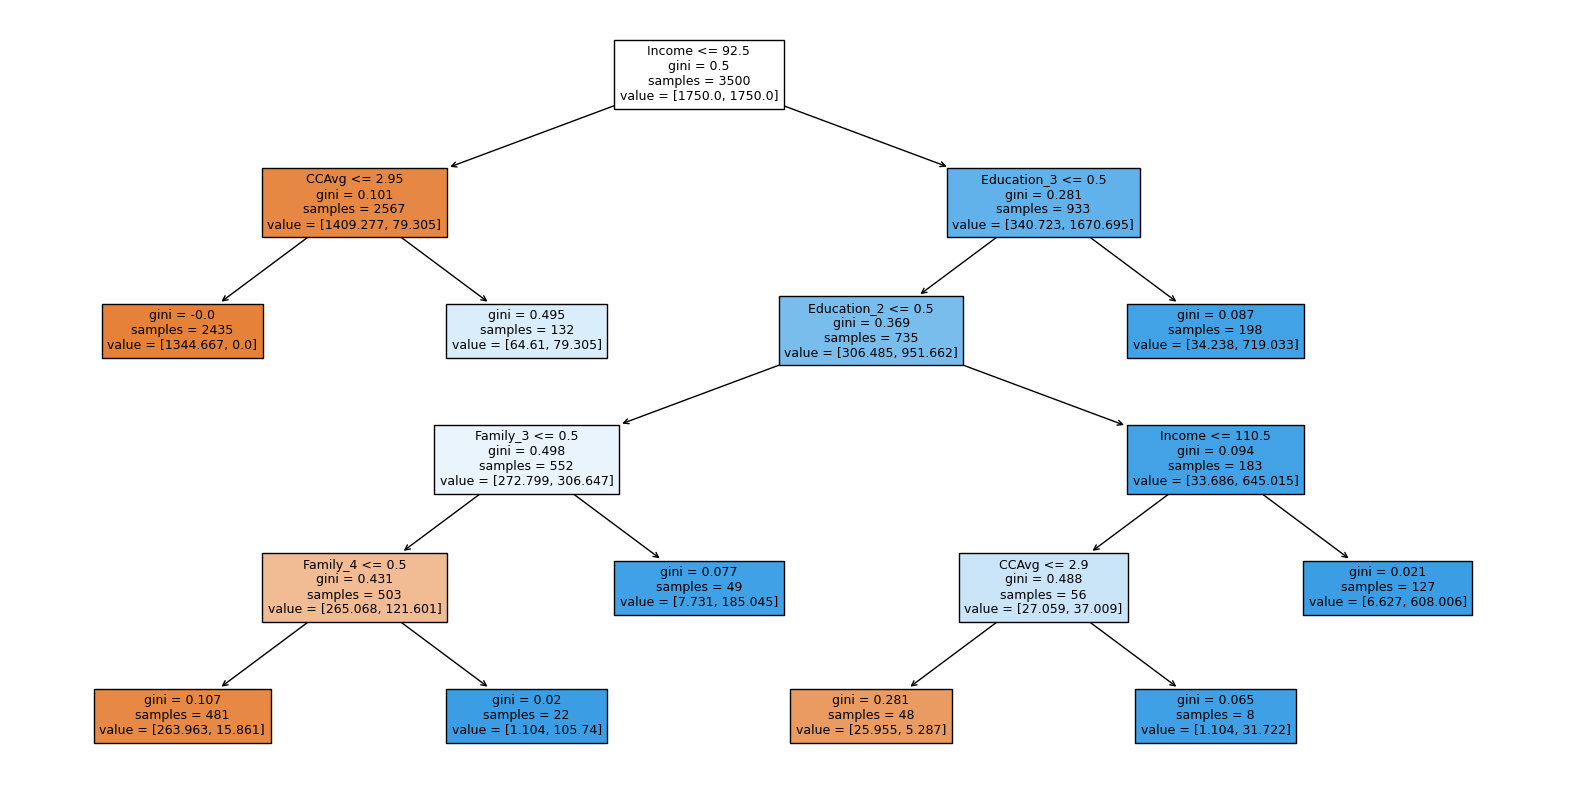

In [208]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [209]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [263.96, 15.86] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [1.10, 105.74] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [7.73, 185.05] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- Income <= 110.50
|   |   |   |   |--- CCAvg <= 2.90
|   |   |   |   |   |--- weights: [25.95, 5.29] class: 0
|   |   |   |   |--- CCAvg >  2.90
|   |   |   |   |   |--- weights: [1.10, 31.72] class: 1
|   |   |   |--- Income >  110.50
|   |   |   |   |--- weights: [6.63, 608.01] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [34.24, 719.03] class: 1



*  We can see that the observation we got from the pre-pruned tree is also matching with the decision tree rules of the post pruned tree.

In [210]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

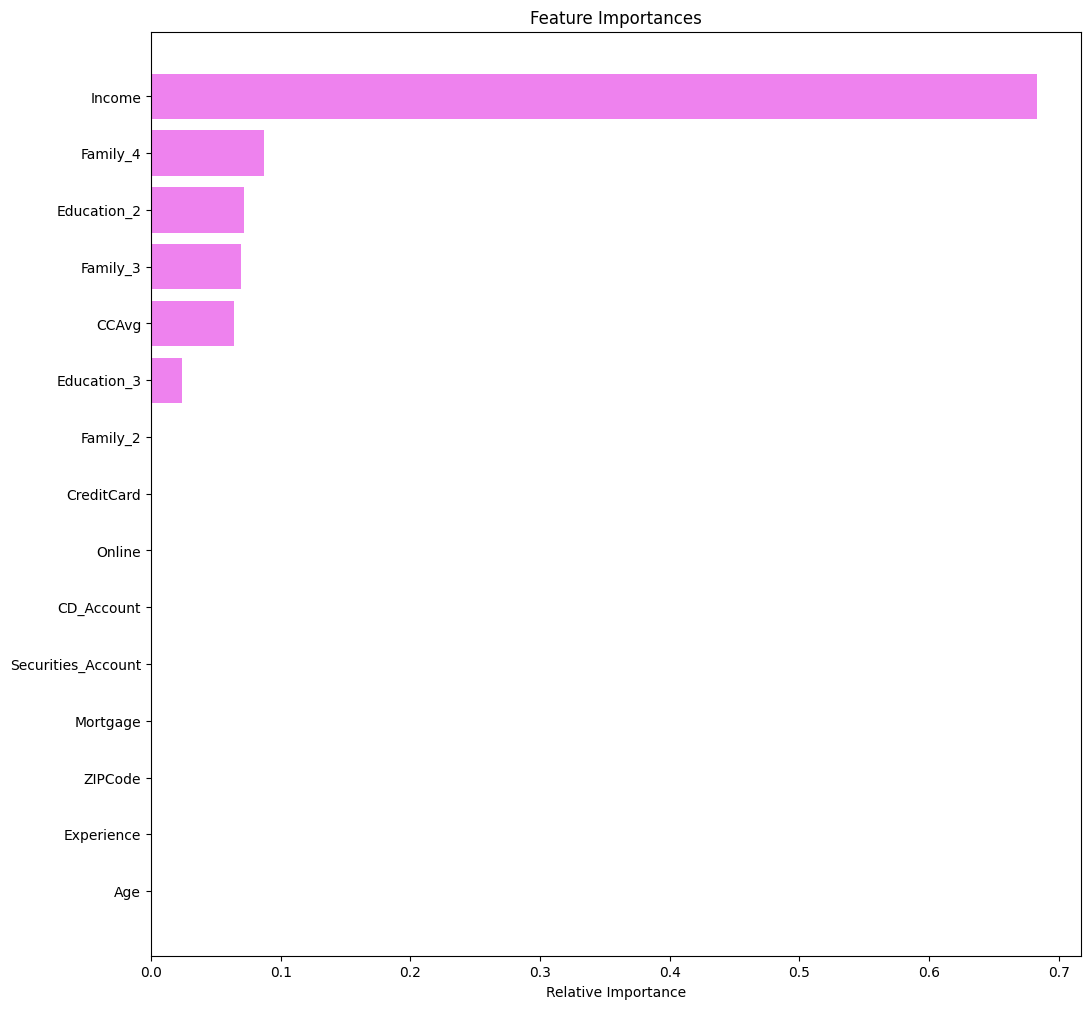

In [211]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the post pruned model, Family is also an important feature in addition to Income, CCAvg & Education.

### Comparison of Models and Final Model Selection

In [212]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.00000,1.00000,0.79029,0.93914
Recall,1.00000,1.00000,1.00000,0.98792
Precision,1.00000,1.00000,0.31080,0.61007
F1,1.00000,1.00000,0.47421,0.75433


In [213]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.97933,0.97800,0.77933,0.93800
Recall,0.89933,0.88591,1.00000,0.97987
Precision,0.89333,0.89189,0.31042,0.61864
F1,0.89632,0.88889,0.47377,0.75844


* Decision tree models with post-pruning are giving high Accuracy, Precision and F1 Scores compared to pre-pruning on both training and test sets.

So, we will choose post pruned tree as the best model !!

# **Conclusions and Recommendations**

**Conclusions:**
* Used a Decision Tree Classifier to build a predictive model. The predictive model helps predict whether a liability customer will buy a personal loan or not. Also, performed hyper-parameter tuning to reduce overfitting during the model selection process.

* Income, education, family, and credit card usage are the most important features in predicting potential loan customers.

* Those customers with separate securities and cd accounts are more likely to get a personal loan.

* Customers who use the bank's online facilities are more likely to get a personal loan versus those customers who don't use the online facilities.


**Recommendations**
* It seems Income is the most important factor. If our customers' yearly income is less than 92.5K, there is a good chance the customer won't have a personal loan.

* From the model, those customers with an income greater than 92.5 and with an education level greater than or equal to 3 (Advanced/Professional) were most likely have a personal loan. Recommend to target customers that have incomes lower than 92.5K.

* It was observed that those customers who use the online facilities were more likely to have personal loans. Make the site more user-friendly and encourage those customers who don't use the online to use the online facilities. Make the application process to get personal loans easy with a better user experience.